In [1]:
from mars_code.mars_currents.load_mag_data_rotate_to_mse import (
    load_data,
    rotated_to_mse,
    plot_space_coverage,
    plot_mse,
)
import os

In [2]:
""" frame: 'ss' (sun-state), 'pc' (planetocentric), 'pl (payload)' [Coordinate system of MAG measurements, 'ss' is MSE]
    sampl: '', '1s' [sampling rate of data]
    start: 'YYYY-MM-DDTHR:MN:SC.###' [starting UTC time]
    end: 'YYYY-MM-DDTHR:MN:SC.###' [ending UTC time]
    freq_sample: int [downsampling, by only getting 1 measurement every freq_sampl measurements]
    folder_path: path of MAG data [point to the folder containing the years]
    kernel_path: absolute path of maven_time_frames.tm spice kernel
    orbits_file_path: path of maven_orbits.txt file [contains information about orbital periapsis epochs]
    spice_pck: absolute path of pck00010.tpc spice kernel

    bow_shock_pars: parameters for conic section model. Default: {'x0':0.74, 'L':1.82, 'eps':1.01} as in Hall et al. 2016

    aberation: in order to correct for aberation, angle in degrees 
"""

data_dict = dict(
    frame="ss",
    sampl="1s",
    start="2015-10-03T00:00:00",
    end="2016-10-15T00:00:00",
    freq_sampl=20,
    folder_path="maven/public/sci/mag/l2",
    kernel_path=os.getcwd() + "/maven_time_frames.tm",
    orbits_file_path="maven_orbits.txt",
    spice_pck=os.getcwd() + "/pck00010.tpc",
)

bow_shock_pars = {"x0": 0.74, "L": 1.82, "eps": 1.01}

aberation = 4

In [3]:
"""Outputs data (epoch, position, B components, aberation corrected position and B components) using pandas dataframes
    Also outputs the orbits periapsis epochs for orbits between start and end time
"""

data, orbits_per = load_data(data_dict, aberation=aberation)

These files do not exist: 

--------------------------------------------------------------------
Loading files: 

 maven/public/sci/mag/l2/2016/10/mvn_mag_l2_2016289ss1s_20161015_v01_r01.sts 

In [8]:
""" aberation here is redundant if data was aberation corrected before, but you can leave it here too. 
    smooth_factor: used to smooth out the magnetic field with a median filter
    save: [True or False, 'text to add in the end of the file'], save if you want to bin the data later. 
    Both all data and data from only inside the bow shock will be saved, so 2 files (I should change this soon).
    out: True or False [outputs the rotated data]

    df: the data in mso
    df_orbits: the periapsis times data

    Outputs: all data rotated to MSE , data from inside the the bow shock rotated to MSE
"""

data_mse, data_mse_in_bs = rotated_to_mse(
    data_dict=data_dict,
    aberation=4,
    smooth_factor=20,
    bow_shock_pars=bow_shock_pars,
    save=[True, "_all"],
    out=True,
    df=data,
    df_orbits=orbits_per,
)


Saved file: mag_mse_2015-10-03_2016-10-14_n20_all.csv, of all data.

Saved file: mag_mse_2015-10-03_2016-10-14_ms_n20_all.csv, of data inside the bow shock.


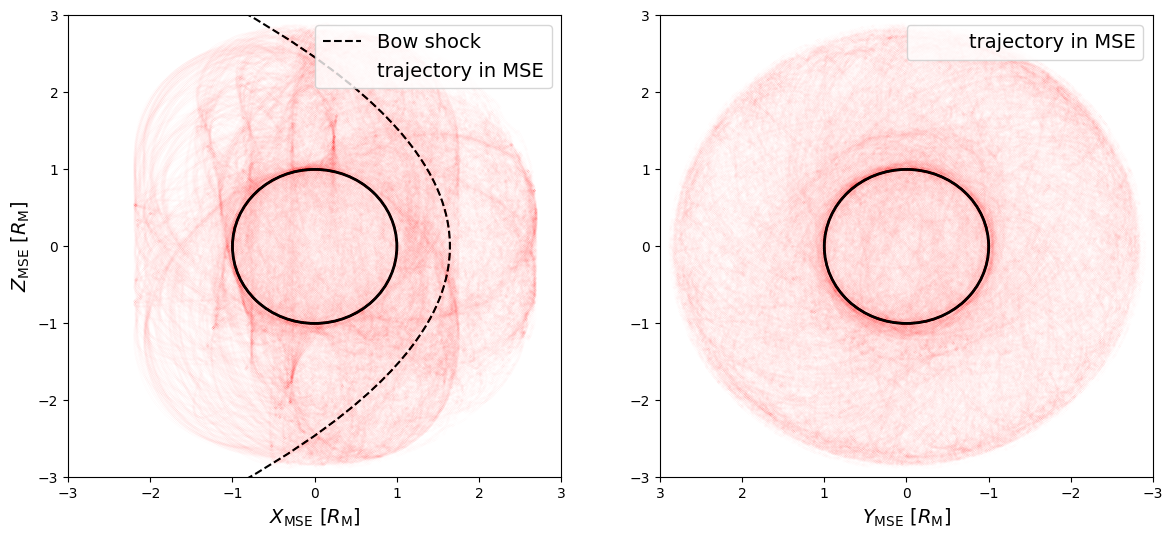

In [5]:
""" plot space coverage and bow shock conic section for all data """
fig, ax = plot_space_coverage(
    df=data_mse, bow_shock_pars=bow_shock_pars, markersize=0.006
)

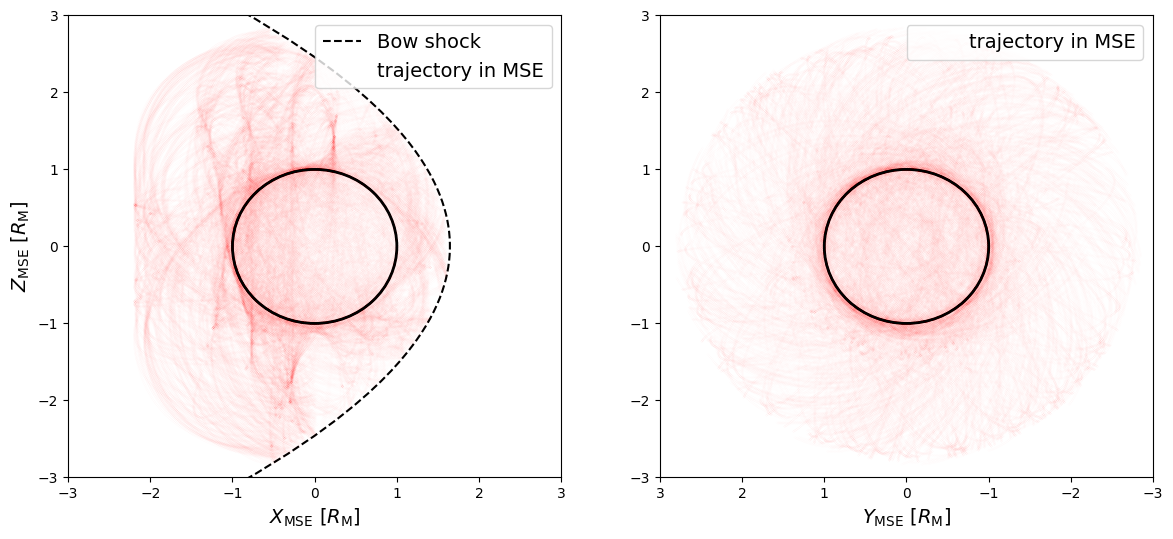

In [6]:
""" same for data inside the bow shock """
fig, ax = plot_space_coverage(
    df=data_mse_in_bs, bow_shock_pars=bow_shock_pars, markersize=0.006
)

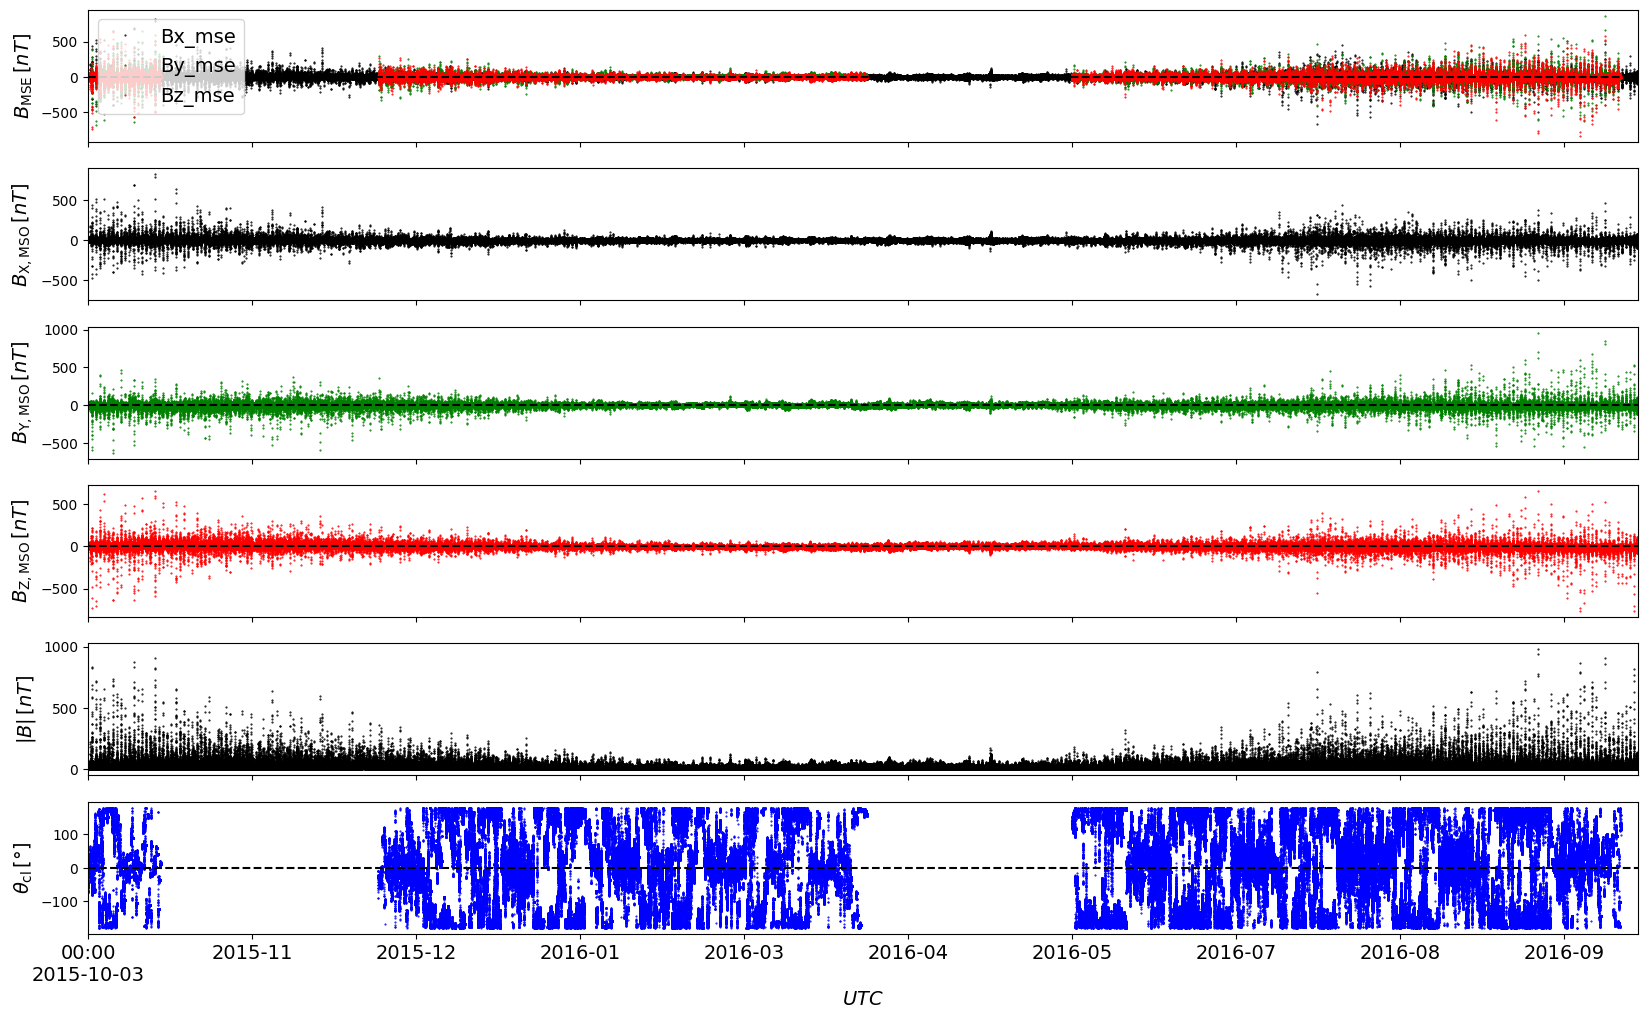

In [7]:
dt = data_dict["freq_sampl"] * 60 * 60 * 24 * 2

fig, ax = plot_mse(
    data_mse,
    plot_dict=dict(
        dt=dt,
        x_lim=[data_dict["start"], data_dict["end"]],
        plot_bs_distance=False,
        plot_location=False,
        markersize=1,
        fig_width=20,
        plot_crossings=dict(plot=False, idx_ms2sw=None, idx_sw2ms=None),
    ),
)